In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [1]:
import torch
 
# if you have cuda enabled GPU and selected a CUDA version, the following code should print "GPU support availble: True"
print("GPU support availble:", torch.cuda.is_available())

GPU support availble: True


In [2]:
from utils import trainer

In [ ]:
CNNtrainer

## I. Import dataset and general overview
The labels dataset `data_labels.csv` includes the **image path**, 15 one-hot-encoded **FACs** and **emotions** in three categories: `negative`, `positive` and `surprise`.

In [4]:
gk_df = pd.read_csv('data/data_labels.csv')

In [5]:
# examine the dataframe
gk_df.head()

,subject,sequence,image_index,filepath,file_prefix,AU17,AU1,AU2,AU25,AU27,...,AU7,AU23,AU24,AU6,AU12,AU15,AU14,AU11,AU26,high_level_emotion
0,S005,1,11,./cohn-kanade-images/S005/001/S005_001_0000001...,S005_001_00000011,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,S010,1,14,./cohn-kanade-images/S010/001/S010_001_0000001...,S010_001_00000014,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,negative
2,S010,2,14,./cohn-kanade-images/S010/002/S010_002_0000001...,S010_002_00000014,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,surprise
3,S010,3,18,./cohn-kanade-images/S010/003/S010_003_0000001...,S010_003_00000018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,S010,4,19,./cohn-kanade-images/S010/004/S010_004_0000001...,S010_004_00000019,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,negative


In [6]:
gk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   subject             560 non-null    object
 1   sequence            560 non-null    int64 
 2   image_index         560 non-null    int64 
 3   filepath            560 non-null    object
 4   file_prefix         560 non-null    object
 5   AU17                560 non-null    int64 
 6   AU1                 560 non-null    int64 
 7   AU2                 560 non-null    int64 
 8   AU25                560 non-null    int64 
 9   AU27                560 non-null    int64 
 10  AU4                 560 non-null    int64 
 11  AU7                 560 non-null    int64 
 12  AU23                560 non-null    int64 
 13  AU24                560 non-null    int64 
 14  AU6                 560 non-null    int64 
 15  AU12                560 non-null    int64 
 16  AU15                560 no

In [7]:
# drop unnecessary columns
drop_columns = ['subject', 'sequence', 'image_index', 'file_prefix']

In [8]:
gk_df = gk_df.drop(columns=drop_columns)

In [9]:
gk_df.head()

,filepath,AU17,AU1,AU2,AU25,AU27,AU4,AU7,AU23,AU24,AU6,AU12,AU15,AU14,AU11,AU26,high_level_emotion
0,./cohn-kanade-images/S005/001/S005_001_0000001...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,negative
1,./cohn-kanade-images/S010/001/S010_001_0000001...,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,negative
2,./cohn-kanade-images/S010/002/S010_002_0000001...,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,surprise
3,./cohn-kanade-images/S010/003/S010_003_0000001...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,negative
4,./cohn-kanade-images/S010/004/S010_004_0000001...,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,negative


#### Examine `high_level_emotion`

In [10]:
gk_df['high_level_emotion'].value_counts()

high_level_emotion
negative    328
positive    121
surprise    111
Name: count, dtype: int64

- The dataset is **imbalanced** as class `negative` accumulated the most.

## II. Data Analysis

In [11]:
FACs = gk_df.columns[1:-1]

In [12]:
FACs

Index(['AU17', 'AU1', 'AU2', 'AU25', 'AU27', 'AU4', 'AU7', 'AU23', 'AU24',
       'AU6', 'AU12', 'AU15', 'AU14', 'AU11', 'AU26'],
      dtype='object')

In [13]:
crosstab = pd.crosstab(gk_df['AU1'], gk_df['high_level_emotion'])

In [14]:
print(crosstab)

high_level_emotion  negative  positive  surprise
AU1                                             
0                        239       117        27
1                         89         4        84


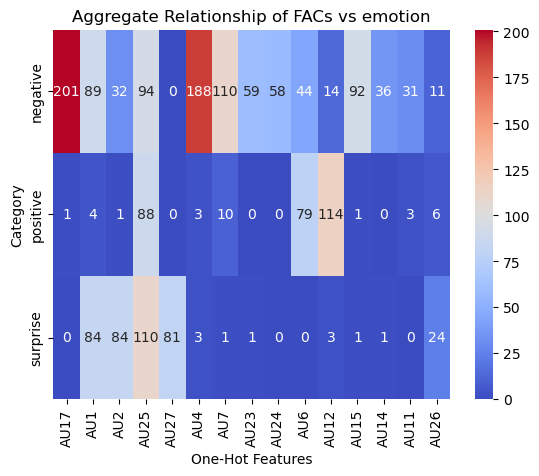

In [21]:
# Sum one-hot encoded features grouped by the categorical feature
grouped_sum = gk_df.groupby('high_level_emotion')[FACs].sum()

# Heatmap to visualize
sns.heatmap(grouped_sum, annot=True, fmt='.0f', cmap='coolwarm')
plt.title("Aggregate Relationship of FACs vs emotion")
plt.ylabel("Category")
plt.xlabel("One-Hot Features")
plt.show()


- The majority of the expression are related to `negative` emotion with **AU17**, **AU7**, **AU4** and **AU15** are the most signifcant indicators.
- **AU6** and **AU12**  play a significant role in the `positive` category.
- **AU1**, **AU2**, **AU25**, **AU27** are the expression that are more related to `surprise`.
- **AU25** is actually common for most of the emotions and slightly represents `surprise` more.
- Several features (like **AU14**, **AU11**, **AU26**) have consistently low counts across all categories => indicating they may not contribute much to distinguishing these categories.

=> *The analysis show that the expressions are strongly related to certain emotion and for that, the **features** we may extract from **CNN models** can be used to dictate both as in **recognizing the facial actions** and **classifying the emotion***

## III. Data Preparation